# Homework IV - ME 364 (Spring 2022)

### <font color='red'>__Question I__</font> 
A series of measurements have been done on a vibrating system, which we can be simplified as a single degree-of-freedom. The stiffness of the system was changed and the time period of the system was measured. The data is recorded in a dataset and attached to this assingment with the name `Q1.csv`. This dataset includes stiffness values and the corresponding time period for the oscillation. Use <u>simple linear regression</u> to estimate the system's mass.

<font color='blue'>__NOTES :__</font>
- For a system with single degree-of-freedom, $\omega_n=\sqrt{\frac{k}{m}}$
- The time period of a system and its natural frequency are related with $\omega_n=\frac{2\pi}{T}$



In [574]:
# Your code goes here

# importing required functions
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# Import the data into a dataframe
url1 = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Homework%204/Q1.csv'
df1 = pd.read_csv(url1)

# Confirm that dataframe uploaded correctly
display(df1.head())

# Create a column that linearly scales with mass (m)
# k = m*(2*pi/T)^2 --> m = k / (2*pi/T)^2 = dx/dy
# Slope of fit line = dy/dx = (2*pi/T)^2 / k
df1['(2*pi/T)^2'] = 4 * np.pi**2 / df1['Time Period (s)']**2

# Define the instance of linear regression
lml = LinearRegression()

# Fitting the model to the data
x1 = np.array(df1['Stiffness (N/m)']).reshape((-1,1))
y1 = df1['(2*pi/T)^2']
lml.fit(x1, y1)

# Reporting the values of weights
w0=lml.intercept_  # w_0
w1=lml.coef_[0]    # W-1
m = 1/w1

# Identifying system mass
print("If regression results are correct, w_0 should be close to 0 and w_1 should be the slope of the transformed data.")
print(f'w_0 = {w0:.3f}, w_1 = {w1:.3f}')

print("The mass of the system should equal 1/w_1.")
print(f'm = 1/w_1 = {m:.3f} kg')

,Stiffness (N/m),Time Period (s)
0,10.000000,6.327388
1,35.789474,3.256412
2,61.578947,2.533519
3,87.368421,2.068982
4,113.157895,1.817985


If regression results are correct, w_0 should be close to 0 and w_1 should be the slope of the transformed data.
w_0 = -0.545, w_1 = 0.106
The mass of the system should equal 1/w_1.
m = 1/w_1 = 9.427 kg


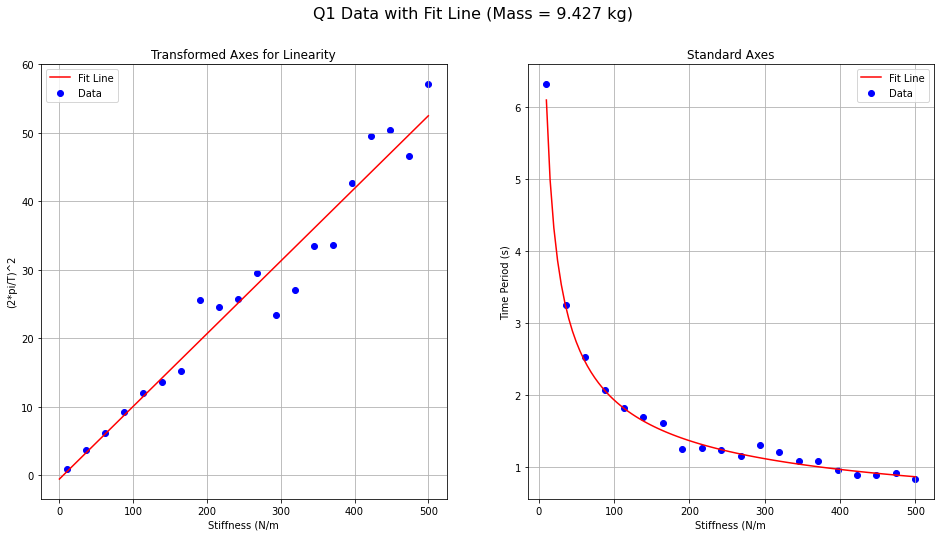

In [575]:
import matplotlib.pyplot as plt

# Plot results
fig, axs = plt.subplots(1,2, figsize=(16,8))
fig.suptitle(f"Q1 Data with Fit Line (Mass = {m:.3f} kg)", fontsize=16)


# First plot - transformed axes to make result linear with m as slope

# Plot raw data on transformed axes
axs[0].scatter(
    x=df1['Stiffness (N/m)'], y=df1['(2*pi/T)^2'],
    label='Data',
    color='b')
# Plot fit line on transformed axes
xplot1=np.linspace(0,500,num=100)
yplot1=w0+w1*xplot1
axs[0].plot(xplot1,yplot1,color='r',label='Fit Line')
axs[0].set_xlabel("Stiffness (N/m")
axs[0].set_ylabel("(2*pi/T)^2")
axs[0].set_title("Transformed Axes for Linearity")
axs[0].legend()
axs[0].grid()


# Second plot - original axes for standard representation of data

# Plot raw data
axs[1].scatter(
    x=df1['Stiffness (N/m)'], y=df1['Time Period (s)'],
    label='Data',
    color='b')
# Plot fit line on transformed axes
xplot2 = np.linspace(df1['Stiffness (N/m)'].min(),500,num=100)
yplot2 = (2 * np.pi) / (np.sqrt(xplot2/m))
axs[1].plot(xplot2,yplot2,color='r',label='Fit Line')
axs[1].set_xlabel("Stiffness (N/m")
axs[1].set_ylabel("Time Period (s)")
axs[1].set_title("Standard Axes")
axs[1].legend()
axs[1].grid()

plt.show()

### <font color='red'>__Question II__</font>


We are trying to model a system with two degrees of freedom (https://www.brown.edu/Departments/Engineering/Courses/En4/Notes/vibrations_mdof/vibrations_mdof.htm) based on some measurement data. We have the magnitude of input force and the corresponding maximum displacements of mass 1 and mass 2 for given input forces. The data is stored in the csv file `Q2.csv`. 

- Use <u>Linear Regression</u> to develop a model to predict the magnitude of the input force if we know the displacements of mass 1 and mass 2.  

- Use evaluation metrics to assess the performance of your model. Is this a good model? Why? Run your model multiple times and look at the evaluation metrics. Do you see anything unusual about these metrics?

- What is the predicted force magnitude when mass 1 and mass 2 displacements both are 0.12 m ?

In [576]:
# Your code goes here

# importing required functions
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# Import the data into a dataframe
url2 = 'https://raw.githubusercontent.com/yairg98/Data-Driven-Problem-Solving/main/Homework%204/Q2.csv'
df2 = pd.read_csv(url2)

# Confirm that dataframe uploaded correctly
display(df2.head())

# defining the I.V. and Target Variable (D.V.)
x_datam=np.array(df2[['Max_Disp_x2 (m)','Max_Disp_x1 (m)']])
y_datam=np.array(df2[['Input Force (N)']])

# Splitting the data into train and test 80/20
x_trainm, x_testm, y_trainm, y_testm=train_test_split(x_datam, y_datam, test_size=0.2, shuffle=True)

# Define the linear regression object
lmm = LinearRegression()

# Fitting the model to the training data
lmm.fit(x_trainm, y_trainm)

# reporting the values of weights
w0m=lmm.intercept_[0]  # w_0
w1m=lmm.coef_[0,0]     # w_1
w2m=lmm.coef_[0,1]     # w_2
print(f'w_0={w0m:0.2f}, w_1= {w1m:.2f} and w2={w2m:.2f}')

# making prediction
yhatm = lmm.predict(x_testm)

# Compare predicted values to actual values
np.column_stack([y_testm, yhatm])

,Input Force (N),Max_Disp_x2 (m),Max_Disp_x1 (m)
0,0.050000,-0.088575,0.076227
1,0.053061,0.136006,0.086865
2,0.056122,0.102389,0.119084
3,0.059184,0.103362,0.007922
4,0.062245,0.069651,-0.021716


w_0=0.06, w_1= 0.14 and w2=0.41


array([[0.13571429, 0.11945551],
       [0.08061224, 0.11301026],
       [0.15714286, 0.13729753],
       [0.19387755, 0.21443265],
       [0.17857143, 0.15525616],
       [0.14183673, 0.16694187],
       [0.1877551 , 0.1809323 ],
       [0.11428571, 0.12207295],
       [0.15102041, 0.11976233],
       [0.05612245, 0.12075008]])

The model seems to perform moderately well. A comparison of the
individual data predicted and actual values in the section above shows
a reasonably significant correlation. However, there are several strange
things about the evaluation metrics, each of which behaves differently
when run multiple times. On multiple consecutive runs with different,
randomly generated test/train data splits, the mean absolute error
remained relatively stable. Though occasionally getting as low as below
.02, it was usually between .025 and .03. I needed to add more
significant figures in order to evaluate the mean sqyared error, which
varried significantly, but stayed mostly within the range of .00050 to 
.00150.

The strangest metric was R2, which varied wildly. In tests that I did it
got as high as 0.8 and as low as 0.06. That does not include the
occasional negative results which got as low as -0.86. All the while,
the other evaluation metrics remained relatively stable.

In [577]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error

MSEm = mean_squared_error(y_testm, yhatm)
print(f'The value of mean squared error is: {MSEm:.5f}')
# R2
from sklearn.metrics import r2_score

r2scorem = r2_score(y_testm, yhatm)
print(f'The value of R2 is: {r2scorem:.2f}')
# Mean Absolute Error
from sklearn.metrics import mean_absolute_error

MAEm=mean_absolute_error(y_testm, yhatm)
print(f'The value of mean absolute error is: {MAEm:.2f}')

The value of mean squared error is: 0.00086
The value of R2 is: 0.53
The value of mean absolute error is: 0.02


Using the model to predict the input force given mass 1 and mass 2
displacements of 0.12 m each.

In [578]:
pred = lmm.predict([[0.12,0.12]])[0][0]

print(f"Predicted Input Force given mass displacements of 0.12m each: {pred:.4f} N")

Predicted Input Force given mass displacements of 0.12m each: 0.1237 N
